# EMODnet Biology pyobis demo

## Install pyobis
The Python package $\texttt {pyobis}$ is available from here: https://github.com/sckott/pyobis. It is a Python client for the OBIS API. Find tutorial and installation manual on the github page. We will be using the installation from $\texttt {pipy}$.

## Download occurence data from OBIS
### By scientific name


In [292]:
% matplotlib notebook

# import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap # for the last scatter on map 
import matplotlib.cm as cm
from pyobis import taxa, occurrences
import folium
from folium.plugins import MarkerCluster, FastMarkerCluster # use the plugins to plot many points on the map


In [124]:
data_taxa = taxa.search(scientificname = 'Ensis', geometry = 'POLYGON ((2.3 51, 2.3 56, 8 56, 8 51,2.3 51))') 
# print data_taxa # explore
data_occ = occurrences.search(scientificname = 'Ensis', geometry = 'POLYGON ((2.3 51, 2.3 56, 8 56, 8 51,2.3 51))', limit=10000) 
len(data_occ['results'])

2000

With $\texttt{pyobis}$ you can only get 2000 at a time. If you want to have the entire dataset, you can download the .zip csv file with the following snippet:

In [125]:
# res = occurrences.download(scientificname = 'Ensis', geometry = 'POLYGON ((2.3 51, 2.3 56, 8 56, 8 51,2.3 51))') 
# res.uuid
# res.status()
# res.fetch()

In [236]:
m = folium.Map(
    location=[53.5, 5.0],
    zoom_start=6,
    tiles='Stamen Terrain'
)

data_sn = []; data_id = []; data_lat = []; data_lon = [];
for k in data_occ['results']:
    data_sn.append(k['scientificName'])
    data_id.append('<i>'+str(k['id'])+'</i>')
    data_lat.append(k['decimalLatitude'])
    data_lon.append(k['decimalLongitude'])
    
# this may take a minute...
# cluster = MarkerCluster(zip(data_lat,data_lon), popups=data_id).add_to(m) 

# this is way faster, but works without popups
clusterf = FastMarkerCluster(zip(data_lat,data_lon)).add_to(m) 

m

In [121]:
mc = folium.Map(
    location=[53.5, 5.0],
    zoom_start=6,
    tiles='Stamen Terrain'
)

# this may take a minute...
for k in data_occ['results']:
    folium.CircleMarker(location=[k['decimalLatitude'], k['decimalLongitude']],
                     popup='<i>'+str(k['id'])+'</i>', 
                     radius=1,
                     line_color='#ff6666', 
                     fill=True,
                     fill_color='#ff6666').add_to(mc)

mc

<IPython.core.display.Javascript object>


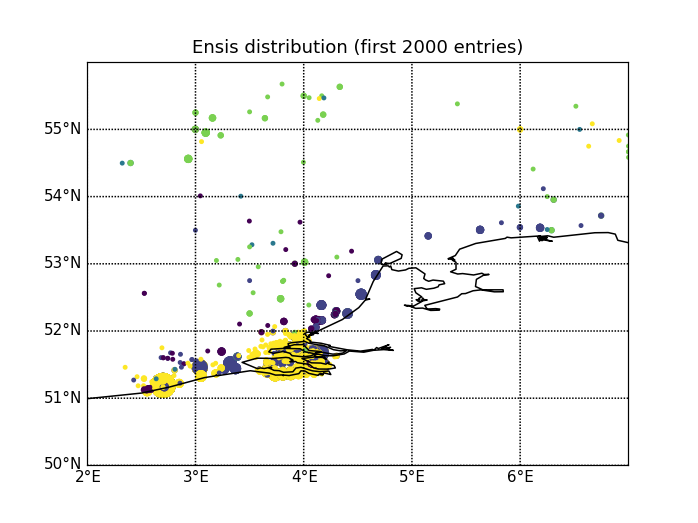

In [310]:
m = Basemap(llcrnrlon=2.,
            llcrnrlat=50.,
            urcrnrlon=7.,
            urcrnrlat=56.,
            projection='cyl',
            resolution='i',
            fix_aspect=False)

x,y=m(data_lon,data_lat)
data_count = [dd.count(xx) for xx in dd]
dc = [dcc*5. for dcc in data_count]

cmapv = plt.get_cmap('viridis')
d = {ni: indi for indi, ni in enumerate(set(data_sn))}
numbers = [d[ni] for ni in data_sn]
colors = cmapv([n/float(len(set(data_sn))-1) for n in numbers])

parallels = np.arange(50.,56,1.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
meridians = np.arange(2.,7.,1.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

m.drawcoastlines()

# show first big circles
ss = np.flipud(np.argsort(dc))
xf = np.array(x)[ss]
yf = np.array(y)[ss]
sf = np.array(dc)[ss]
cf = np.array(colors)[ss]

sc = m.scatter(xf,yf,s=sf,c=cf,marker="o",alpha=1, vmin=0, vmax=5, cmap=cmapv)
plt.title('Ensis distribution (first 2000 entries)')
plt.show()